In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras import layers

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [10]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2665 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1082 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0709 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0512 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0377 - accuracy: 0.9888


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0657 - accuracy: 0.9794
test_acc: 0.9793999791145325


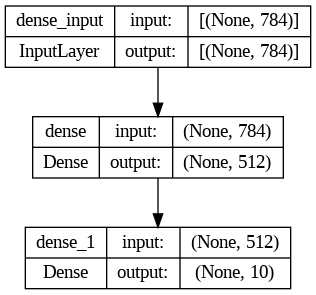

In [14]:
keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [17]:
model.predict(test_images[0:1])

1/1 [==============================] - 0s 72ms/step


array([[9.98847796e-08, 1.40433505e-08, 8.85739883e-06, 2.18800815e-05,
        4.50311489e-11, 7.76259412e-09, 1.66563226e-12, 9.99968410e-01,
        1.06517541e-08, 7.55677036e-07]], dtype=float32)